In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup


In [4]:
url = 'https://news.naver.com/breakingnews/section/101/259'
res = requests.get(url).text

In [5]:
soup = BeautifulSoup(res)
soup

<!DOCTYPE html>
<html data-useragent="python-requests/2.32.3" lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="경제 : 네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/breakingnews/section/101/259" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_800x420_20221201.png" property="og:image"/>
<meta content="증권, 금융, 부동산, 기업, 국제 등 경제 분야 뉴스 제공" property="og:description"/>
<meta content="네이버" property="og:article:author"/>
<meta content="summary" name="twitter:card"/>
<meta content="경제 : 네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<met

In [6]:
tmp = soup.select_one('ul.sa_list').select('li', limit=5)
print(tmp[0].select_one('strong.sa_text_strong').text)
print(tmp[0].select_one('div.sa_text_datetime.is_recent').text)
print(tmp[0].select_one('a')['href'])

“스튜어드십 코드 이행력 높여야…미흡하면 등록 폐지 등 필요”

1분전

https://n.news.naver.com/mnews/article/028/0002729519


In [7]:
new_list=[]

for li in tmp:
    new_info = {'title':li.select_one('strong.sa_text_strong').text,
                'data':li.select_one('div.sa_text_datetime.is_recent').text,
                'new_url':li.select_one('a')['href']}
    # print(new_info)
    new_list.append(new_info)

new_list[1]

{'title': 'IBK기업은행, 개인사업자 전용 인증서 출시',
 'data': '\n2분전\n',
 'new_url': 'https://n.news.naver.com/mnews/article/030/0003281140'}

In [8]:
# 뉴스 본문 가져오기

for new in new_list:
    new_url = new['new_url']
    # print(new_url)
    res = requests.get(new_url).text
    soup = BeautifulSoup(res)
    # print(soup)

    body = soup.select_one('article.go_trans._article_content')
    new_content = body.text.replace('\n','').strip()
    
    # print(new_content)
    new['news_content'] = new_content

df = pd.DataFrame(new_list)
df

,title,data,new_url,news_content
0,“스튜어드십 코드 이행력 높여야…미흡하면 등록 폐지 등 필요”,\n1분전\n,https://n.news.naver.com/mnews/article/028/000...,김소영 금융위 부위원장이 5일 오전 서울 중구 은행회관에서 열린 스튜어드십 코드 발...
1,"IBK기업은행, 개인사업자 전용 인증서 출시",\n2분전\n,https://n.news.naver.com/mnews/article/030/000...,IBK기업은행은 개인사업자 전용 'IBK인증서'를 출시했다고 5일 밝혔다. 기업은행...
2,"수출입銀, 1Q 수출 1670억~1680억달러 전망…동기比 2~3%↑",\n4분전\n,https://n.news.naver.com/mnews/article/030/000...,수출입은행 해외경제연구소는 5일 '2024년 4분기 수출실적 평가 및 2025년 1...
3,KB금융 스타프렌즈 “아시안게임 국대 응원합니다”,\n4분전\n,https://n.news.naver.com/mnews/article/018/000...,하얼빈 동계 아시안게임 참가 선수들 응원[이데일리 김나경 기자] KB금융그룹이 그룹...
4,"[포토]이복현 금감원장, ""IPO 기업 사전·사후 회계심사 강화"" 주문",\n5분전\n,https://n.news.naver.com/mnews/article/018/000...,[이데일리 방인권 기자] 이복현 금융감독원장이 5일 서울 서대문구 한국공인회계사회관...


In [11]:
from konlpy.tag import Okt
import collections

okt = Okt()

clist =[]
for word in df['news_content']:
    token = okt.pos(word)
    for word, tag in token:
        if tag in ['Noun', 'Adjective']:
            clist.append(word)
counts = collections.Counter(clist)
tag = counts.most_common(50)
print(tag)    


[('있다', 14), ('등', 12), ('금융', 12), ('수출', 12), ('스튜어드', 11), ('코드', 11), ('스타', 9), ('프렌즈', 9), ('기관', 8), ('참여', 7), ('이행', 6), ('수', 6), ('인증서', 6), ('기업', 6), ('발전', 5), ('위', 5), ('증가', 5), ('것', 5), ('선수', 5), ('응원', 5), ('방안', 4), ('한국', 4), ('활용', 4), ('확대', 4), ('말', 4), ('기업은행', 4), ('하얼빈', 4), ('동계', 4), ('아시안', 4), ('게임', 4), ('그룹', 4), ('캐릭터', 4), ('금융위', 3), ('원장', 3), ('서울', 3), ('회관', 3), ('논의', 3), ('자본시장', 3), ('위원회', 3), ('올해', 3), ('마련', 3), ('예정', 3), ('황', 3), ('경우', 3), ('평가', 3), ('유지', 3), ('있어', 3), ('있는', 3), ('지난해', 3), ('전망', 3)]


<>:7: SyntaxWarning: invalid escape sequence '\W'
<>:7: SyntaxWarning: invalid escape sequence '\W'
C:\Users\B8-07\AppData\Local\Temp\ipykernel_8072\1864346598.py:7: SyntaxWarning: invalid escape sequence '\W'
  fpath = 'C:\Windows\Fonts\malgunbd.ttf'


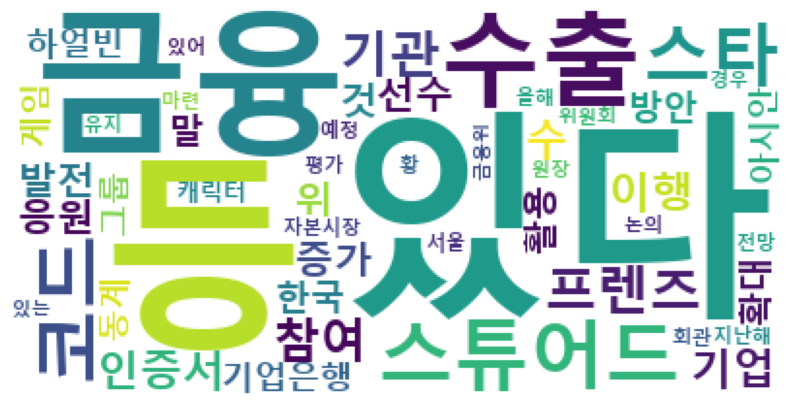

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

s_word = STOPWORDS.union({'있다', '이', '것'})

fpath = 'C:\Windows\Fonts\malgunbd.ttf'
wc = WordCloud(font_path=fpath, background_color='white')
cloud = wc.generate_from_frequencies(dict(tag))

plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)